<center><h1>BAYESIAN BELIEF NETWORK</h1></center>

<h3>Name : Rahul Prasanth D</h3>
<h3>Roll Number : 2020506070</h3>

<h2>Dataset Information</h2>
<u>DataSet name</u> : <b>Adult dataset</b><div></div>
<u>Description</u> : This dataset contains the information about the income i.e <=50K or >50K. With the help of some attributes we can determine the target

 **<h1>Aim: </h1>**
The aim of this notebook is to perform BBN on the given Adult Income Dataset

# Libs

In [1]:
import pandas as pd
import numpy as np
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

from pybbn.graph.dag import Bbn
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.graph.edge import Edge, EdgeType
from pybbn.pptc.inferencecontroller import InferenceController
from pybbn.graph.jointree import EvidenceBuilder

In [2]:
dataset=pd.read_csv("dataset/adult_new.csv")

In [3]:
dataset

,Age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22275,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
22276,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
22277,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
22278,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
dataset.columns


Index(['Age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:

dataset["hours-per-week"]=dataset["hours-per-week"].astype("object")

<h1>PREPROCESSING </h1>

In [6]:
dataset['hours-per-week'] = dataset['hours-per-week'].apply(lambda x: '<=40' if x <= 40 else '>40')

In [7]:
dataset

,Age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,<=40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,<=40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,<=40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,<=40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,<=40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22275,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,<=40,United-States,>50K
22276,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,<=40,United-States,>50K
22277,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,<=40,United-States,>50K
22278,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,<=40,United-States,>50K


In [8]:
physical=['Farming-fishing',' Handlers-cleaners',' Machine-op-inspct','Armed-Forces',' Craft-repair']

In [9]:
dataset['occupation'] = dataset['occupation'].apply(lambda x: 'physical' if x in physical else 'others')

In [10]:
dataset["Age"]=dataset["Age"].apply(lambda x:'<=40' if x<=40 else '>40')

In [11]:
dataset

,Age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,<=40,State-gov,77516,Bachelors,13,Never-married,others,Not-in-family,White,Male,2174,0,<=40,United-States,<=50K
1,>40,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,others,Husband,White,Male,0,0,<=40,United-States,<=50K
2,<=40,Private,215646,HS-grad,9,Divorced,physical,Not-in-family,White,Male,0,0,<=40,United-States,<=50K
3,>40,Private,234721,11th,7,Married-civ-spouse,physical,Husband,Black,Male,0,0,<=40,United-States,<=50K
4,<=40,Private,338409,Bachelors,13,Married-civ-spouse,others,Wife,Black,Female,0,0,<=40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22275,>40,?,287372,Doctorate,16,Married-civ-spouse,others,Husband,White,Male,0,0,<=40,United-States,>50K
22276,<=40,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,others,Wife,White,Female,0,0,<=40,United-States,>50K
22277,>40,Private,321865,Masters,14,Married-civ-spouse,others,Husband,White,Male,0,0,<=40,United-States,>50K
22278,<=40,Private,154374,HS-grad,9,Married-civ-spouse,physical,Husband,White,Male,0,0,<=40,United-States,>50K


## Finding the Probablities of the each features

In [12]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[child],data[parent2]], data[parent1],margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  

In [13]:
Age=BbnNode(Variable(0,'Age',['<=40','>40']),probs(dataset,child='Age'))
gender=BbnNode(Variable(1,'gender',['Male','Female']),probs(dataset,child='gender',parent1='Age'))
occ=BbnNode(Variable(2,'occ',['physical','others']),probs(dataset,child='occupation'))
hours=BbnNode(Variable(3,'hours',['<=40','>40']),probs(dataset,child='hours-per-week',parent1='occupation'))
incom=BbnNode(Variable(4,'incom',['<=50','>50']),probs(dataset,child='gender',parent1='gender',parent2='hours-per-week'))


bbn = Bbn() \
    .add_node(Age) \
    .add_node(gender) \
    .add_node(occ) \
    .add_node(hours) \
    .add_node(incom) \
    .add_edge(Edge(Age, gender, EdgeType.DIRECTED)) \
    .add_edge(Edge(occ, hours, EdgeType.DIRECTED)) \
    .add_edge(Edge(gender, incom, EdgeType.DIRECTED)) \
    .add_edge(Edge(hours, incom, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

# GRAPH

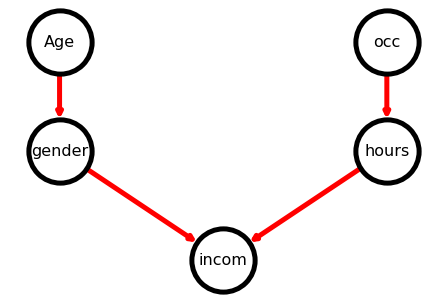

In [14]:
# Set node positions
pos = {0:(-1,2),1: (-1, 0.5), 2: (1, 2), 3: (1, 0.5), 4: (0, -1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [15]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node: ", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node:  1|gender|Male,Female
Values:
1=Male|0.30489
1=Female|0.69511
----------------
Node:  0|Age|<=40,>40
Values:
0=<=40|0.55794
0=>40|0.44206
----------------
Node:  3|hours|<=40,>40
Values:
3=<=40|0.67774
3=>40|0.32226
----------------
Node:  2|occ|physical,others
Values:
2=physical|0.77724
2=others|0.22276
----------------
Node:  4|incom|<=50,>50
Values:
4=<=50|0.30489
4=>50|0.69511
----------------


In [16]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder().with_node(join_tree.get_bbn_node_by_name(nod)).with_evidence(cat, val).build()
    join_tree.set_observation(ev)

In [17]:
#p(occ|phy) and p(occ|oth)
p_age_yes=join_tree.get_bbn_potential(Age).entries[0].value;
p_age_no=join_tree.get_bbn_potential(Age).entries[1].value;

In [18]:
#p(gender|Age).p(Age)
evidence('ev1', 'Age', '<=40', 1.0)
p_gen_age_yes = join_tree.get_bbn_potential(hours).entries[1].value
join_tree.unobserve([occ])
#p(gender|~occ).p(Age)
evidence('ev1', 'Age', '>40', 1.0)
p_gen_age_no = join_tree.get_bbn_potential(hours).entries[1].value
join_tree.unobserve([occ])


In [19]:
p_gender_male=p_gen_age_yes*p_age_yes + p_gen_age_no*p_age_no
print(p_gender_male)

0.3222621184919211


In [20]:
p_gender_female=1-p_gender_male

In [21]:
print(p_gender_female)

0.6777378815080789


In [22]:
# #p(gender|male) and p(gender|female)

# p_gender_male=join_tree.get_bbn_potential(gender).entries[0].value;
# p_gender_female=join_tree.get_bbn_potential(gender).entries[1].value;

In [23]:
print(p_gen_age_yes)

0.32226211849192105


In [24]:
print(p_gen_age_no)

0.3222621184919211


In [25]:
print(join_tree.get_bbn_potential(gender))

1=Male|0.26155
1=Female|0.73845


In [26]:
#p(income|hours,male)
evidence('ev1', 'hours', '<=40', 1.0)
evidence('ev2', 'gender', 'Male', 1.0)
p_hours_yes_gender_male = join_tree.get_bbn_potential(incom).entries[1].value
join_tree.unobserve([hours, gender])

#p(income|hours,female)
evidence('ev1', 'hours', '<=40', 1.0)
evidence('ev2', 'gender', 'Female', 1.0)
p_hours_yes_gender_female = join_tree.get_bbn_potential(incom).entries[1].value
join_tree.unobserve([hours, gender])

#p(income|~hours,male)
evidence('ev1', 'hours', '>40', 1.0)
evidence('ev2', 'gender', 'Male', 1.0)
p_hours_no_gender_male = join_tree.get_bbn_potential(incom).entries[1].value
join_tree.unobserve([hours, gender])

#p(income|~hours,female)
evidence('ev1', 'hours', '>40', 1.0)
evidence('ev2', 'gender', 'Female', 1.0)
p_hours_no_gender_female = join_tree.get_bbn_potential(incom).entries[1].value
join_tree.unobserve([hours, gender])

In [27]:
#p(occ|phy) and p(occ|oth)
p_occ_phy=join_tree.get_bbn_potential(occ).entries[0].value;
p_occ_oth=join_tree.get_bbn_potential(occ).entries[1].value;

In [28]:
print(join_tree.get_bbn_potential(occ))

2=physical|0.77724
2=others|0.22276


In [29]:
#p(hours|occ).p(occ)
evidence('ev1', 'occ', 'physical', 1.0)
p_hr_occ_phy = join_tree.get_bbn_potential(hours).entries[1].value
join_tree.unobserve([occ])



#p(hours|~occ).p(~occ)
evidence('ev1', 'occ', 'others', 1.0)
p_hr_occ_other = join_tree.get_bbn_potential(hours).entries[1].value
join_tree.unobserve([occ])

In [30]:
p_hrs_yes=p_hr_occ_phy*p_occ_phy + p_hr_occ_other*p_occ_oth
p_hrs_yes

0.322262118491921

In [31]:
p_hrs_no=1-p_hrs_yes
p_hrs_no

0.677737881508079

# APPLYING ALL THE TERMS IN THE FORMULA

<h3> p_income_yes = (p_hours_yes_gender_male*p_hrs_yes*p_gender_male)+(p_hours_yes_gender_female*p_hrs_yes*p_gender_female)+(p_hours_yes_gender_male*p_hrs_no*p_gender_male)+(p_hours_yes_gender_female*p_hrs_no*p_gender_female)</h3>

In [32]:
p_income_yes=(p_hours_yes_gender_male*p_hrs_yes*p_gender_male)+(p_hours_yes_gender_female*p_hrs_yes*p_gender_female)+(p_hours_yes_gender_male*p_hrs_no*p_gender_male)+(p_hours_yes_gender_female*p_hrs_no*p_gender_female)

In [33]:
p_income_yes

0.6777378815080789

In [34]:
p_income_no=1-p_income_yes

In [35]:
p_income_no

0.3222621184919211

# PROBABILITY OF INCOME <=50 IS

In [36]:
p_income_yes

0.6777378815080789

<h1>Result</h1>
Thus, Bayesian Belief Network has been performed on the adult income dataset. 